# 유방암 환자 데이터셋을 활용한 지도학습 학습모델 평가 

In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

## 학습모델 평가 방법(Evaluation)
- 오차 (Error) 이해 : 실제 정답(y) - AI가 예측한 값(Y hat)
- Accuracy(정확도)
- Confusion Matrix(오차행렬) : 정확도의 맹점을 보완
- Precision(정밀도) : 오차행렬에서 정밀도와 재현율 개념 나온다 - 이 둘도 맹점이 있음
- Recall(재현율)
- F1 score : 정밀도와 재현율의 조화평균
- ROC/AUC : 역량 커지면 여기까지 오자!


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np  # 데이터 정제하기 위해 np, pd 사용
import pandas as pd

#### 해당 데이터가 우리가 목표하는 feature를 갖고 있나 확인해야 함
#### 데이터의 features를 eda로 탐색해야 한다( by seaborn) 
유방암 환자 데이터셋 로드  
sklearn의 내장 dataset 활용 : load_breast_cancer  
target :
- 1 양성종양 : 착한 종양(Positive)
- 0 악성종양 : 나쁜 종양(Negative)

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer # dict type

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer.data    # data가 2차원 nparray(matrix)로 들어가있음
# cancer.(load한 데이터 객체) 하고 tab키 눌러 사용할만한 메서드 사용해보기
# data는 반드시 2차원 array 형태여야 df으로 변환할 수 있다.

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target_names # cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [8]:
print(cancer['DESCR']) # chrome store에서 tooltip 다운로드 받아 번역
# jupyter에서 cancer['DESCR'] 코드 입력해도 ok (but, \n 그대로 출력됨)
# 따라서 print문에 넣어 \n(new line character)이 제거된 보기에 깔끔한 출력물이 나옴
# 'DESCR' = description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### scikit-learn -> User Guide -> Dataset loading utilities -> Toy datasers
- 머신러닝 학습할 때 정제된 데이터인 toy datasets 사용 - data type 등 나와 있으니 확인해보기
- scikit-learn 은 머신러닝을 위한 데이터 프레임 제공하지만
- seaborn 등 타 사이트에 저장되어 있는 dataset은 머신러닝 하기엔 데이터 양이 너무 적어
  titanic, iris 제외하고는 잘 사용하지 않음 


In [9]:
# feature(X), target(y), feature_names 분리
data = cancer['data'] # scipy에 내장된 data는 dict type으로 되어 있다. 따라서, key값으로 분리하기
target = cancer['target'] # data = 각 features = x ; target = y
feature_names=cancer['feature_names']

In [10]:
# 위처럼 분리한 이후, 하나씩 console에 찍어보면서 각 데이터가 어떻게 구성되어 있는지 확인
target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

데이터 프레임으로 생성
- pd 사용하기 위해 df로 변환해주기

In [12]:
df = pd.DataFrame(data=data, columns=feature_names) # "data"(X값)에 'columns='로 label까지 추가
df['target'] = cancer['target'] # 'target' column(y값) 추가한 후 기존 df에 덮어씀

In [13]:
df.head() 
# troubleshooting 하기 편한 jupyter notebook : 데이터 수정 결과를 print할 필요 없이 바로 df 확인 가능

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
df_pos = df.loc[df['target']==1] # 양성종양 # df_pos = df[df['target']==1] ok
df_neg = df.loc[df['target']==0] # 악성종양
# pandas 사용하는 이유: 반복문 사용할 필요없이 조건(T/F)에 맞는 데이터만 추출 가능
# 이 작업을 하기 위해 df['target'] = cancer['target'] 한 것 : 머신러닝 하려면 반드시 숫자 type의 target column을 추가해야 함

In [15]:
df_pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [16]:
df_pos.shape # 데이터를 편향되게 주면? 고양이 200장, 강아지 50장 주고 학습하면 분류기는 강아지도 고양이로 분류
# 따라서 데이터를 적정한 비율로 줘야 한다. 
# shape 함수를 이용하는 이유는 target data의 분포 비율이 편향되지 않는지 확인하기 위함

(357, 31)

In [17]:
df_neg.shape

(212, 31)

## 필요한 데이터로 데이터셋 만들기
극단적으로 데이터 표현, 다음과 같이 data 생성  
양성 환자 **357개** + 악성 환자 **5개**

In [18]:
df_pos.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [19]:
df_neg[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df_sample = pd.concat([df_pos, df_neg[:5]], sort=True) # concat은 합쳐주는 함수

In [21]:
X = df_sample.drop('target', axis=1) # X에 있는 'target' column은 삭제
y = df_sample['target'] # y에 target column을 대입해서 X,y 분리
# X는 입력할 데이터(=Feature = 변수: DataFrame type), y는 정답(위에서 차례대로 mapping되는 label=target)
# 정답과 입력 데이터를 따로 뽑는 이유? 컴퓨터를 학습시키기 위해(입력 데이터를 넣어주고, 이게 정답이야하며 컴퓨터에 알려줘야 함)

In [22]:
# 성능 평가를 위해(예측값과 정답값 비교하기 위해): 위에서 하나의 dataset을 만든 후 지금처럼 split함
# 다른 y값을 주면 AI가 예측 제대로 했는지 알 수 없기 때문에 하나의 dataset에서 쪼개야 함
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20, shuffle=True)
# X_test에서 출력된 y predict(y hat)을 y_test와 비교해 성능 평가

In [23]:
X # DataFrame

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,153.400,0.049040,0.015870,0.05373,0.006193,1001.0,0.27760,0.147100,0.30010,0.07871,...,2019.0,0.66560,0.26540,0.71190,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.080,0.013080,0.013400,0.01860,0.003532,1326.0,0.07864,0.070170,0.08690,0.05667,...,1956.0,0.18660,0.18600,0.24160,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.030,0.040060,0.020580,0.03832,0.004571,1203.0,0.15990,0.127900,0.19740,0.05999,...,1709.0,0.42450,0.24300,0.45040,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.230,0.074580,0.018670,0.05661,0.009208,386.1,0.28390,0.105200,0.24140,0.09744,...,567.7,0.86630,0.25750,0.68690,0.17300,98.87,14.910,0.20980,0.6638,26.50


In [24]:
y # Series

19    1
20    1
21    1
37    1
46    1
     ..
0     0
1     0
2     0
3     0
4     0
Name: target, Length: 362, dtype: int64

## 모델 정의 및 모델 학습

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model_dtc = DecisionTreeClassifier(max_depth=5) # 클래스로 정의된 분류기를 인스턴스화해서 객체 생성(=메모리에 올리는 작업) 
               # 객체로 생성해야 분류기에 정의된 함수(연산...수행)와 속성을 사용할 수 있음
# DecisionTree의 최대 단점이 입력한 데이터에만 과적합될 가능성이 있다는 것. 따라서, max_depth를 반드시 줘야 함

In [27]:
model_dtc.fit(X_train, y_train)  
# 순서 중요: X_train, y_train 으로 넣어야 함
# fit으로 학습 모델 만들어짐(medel_dtc = 머신러닝으로 만들어진 지능)

DecisionTreeClassifier(max_depth=5)

In [28]:
pred_y = model_dtc.predict(X_test) # X_test = test를 위한 입력값
pred_y   
# 예측치가 나옴 - AI가 모두 양성으로 예측했음을 확인할 수 있다 = Accuracy의 함정

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [29]:
(pred_y == y_test).mean()

0.978021978021978

의사가 모든 암환자 진단을 양성으로 판단한다고 가정하면,  

In [30]:
# 모두 양성종양으로 진단하는 데이터 구성
pred_temp = np.ones(shape=y_test.shape)
pred_temp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [31]:
pred_temp == y_test

55      True
61      True
464     True
3      False
268     True
       ...  
175     True
179     True
304     True
405     True
485     True
Name: target, Length: 91, dtype: bool

In [32]:
(pred_temp == y_test).mean()
# 괄호 하는 이유: pred_temp == y_test 먼저 실행하고(T/F) 그 결과에 대한 평균을 내게 하기 위해

0.989010989010989

의사가 모두 양성종양으로 진단한것과 ML 예측을 비교했을 때,  
예측률은 높으나 유능한 의사라 보기 어려움

### 정확도의 모순
- 정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 자료 
- Accuracy = (예측 결과와 실제 데이터가 동일한 건수) / (전체 예측 데이터 건수)

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 **위와 같은 오류**에 빠질 수 있음.

이를 보완하기 위해 나온 지표들을 살펴보자.

### confusion maxtix(오차 행렬, 혼동 행렬) 
이진 분류의 **예측 오류가 얼마인지와 어떠한 유형의 예측 오류**가 발생하고 있는지를 함께 나타내는 자료
- 그림1에서 true negative(임신 안했음을 안했다고 예측)와 true positive = True
- false positive와 false negative = error  


- 그림2(5를 판별하는 분류기)
- TN(5가 아닌 숫자를 5가 아니라고 예측), TP(5를 5라고 예측) = True
- FP와 FN은 AI의 예측값이 잘못된 것 = Error

<img src='http://www.info.univ-angers.fr/~gh/Predipath/confusion.png' width="500px">

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FPPAoe%2FbtrewxCS6Jn%2FHNzbSntqGyhIcPvv1eNWX1%2Fimg.png' width="500px">


<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbKYE4M%2FbtrewgA9ioX%2F7geXmrx7gC8mAQKEFyQcgK%2Fimg.png' width="500px">

정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 자료 
#### 정확도(Accuracy) = (TN+TP) / (TN+FP+FN+TP)

In [33]:
# confusion_matrix 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_y) # (target값, 예측결과값)

array([[ 0,  1],
       [ 1, 89]])

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

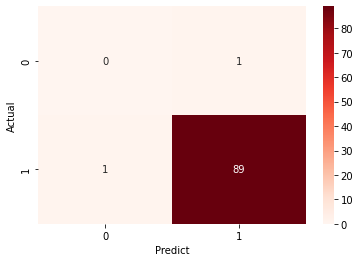

In [35]:
sns.heatmap(confusion_matrix(y_test, pred_y), annot=True, cmap='Reds') # naming: pred_y or pred_dtc
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbKYE4M%2FbtrewgA9ioX%2F7geXmrx7gC8mAQKEFyQcgK%2Fimg.png' width='500px' align='left'>

## 정밀도(precision), 재현율(recall), f1-score
- FN과 FP를 보완하기 위해 나온 개념

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbcl2mQ%2FbtretcGttea%2FMdaetVdrYnb2OZTEI3v8P1%2Fimg.jpg' align='left'>

In [36]:
from sklearn.metrics import precision_score, recall_score

## 정밀도, 재현율, f1-score

### 정밀도 (precision)
예측(y hat)을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치(y hat = y)한 데이터의 비율.  
Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 **양성 예측 정확도** 라고 함.  
정밀도  = TP / (TP + FP)

In [38]:
# 정밀도 구하기
precision_score(y_test, pred_y)

0.9888888888888889

In [2]:
89/90  # (TP=89, TP+FN=90)

0.9888888888888889

무조건 **양성**으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않음.

### 재현율 (recall)
실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율   
정확하게 감지한 **양성 샘플의 비율**

민감도 (sensitivity) 혹은 TRP(True Positive Rate) 이라고도 함.  
재현율 = TP / (TP + FN)

In [40]:
# 재현율 구하기
recall_score(y_test, pred_y)

0.9888888888888889

In [41]:
90/90 #TP/(TP+FN)

1.0

정밀도와 재현율의 trade off 관계 - precision과 recall 그래프의 교점을 찾는 것이 주요 과제임

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcsCuPC%2FbtreoU1fkNK%2FFQjniKMtev65WSfiJxptx0%2Fimg.png' width='400px' align='center'>

[참고] 정밀도와 재현율   
https://velog.io/@sset2323/03-03.-%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80-%EC%9E%AC%ED%98%84%EC%9C%A8

정밀도와 재현율의 수치가 적절하게 조합되어 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요함.

### f1 score
- 정밀도와 재현율의 trade off 관계를 보완하기 위해 f1 score 등장
정밀도와 재현율의 **조화 평균**을 나타내는 지표(ex- 평균 속력, 평균 변화율 구할 때 조화 평균 사용)  
조화평균 참고 : https://www.youtube.com/watch?v=pwJ-SDyZ_3A    
조화평균 : 평균적인 변화율 계산, 공식(2ab/a+b)  

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



In [42]:
from sklearn.metrics import f1_score

In [44]:
f1 = f1_score(y_test, pred_y)

In [45]:
print('f1 스코어: {0:.4f}'.format(f1))

f1 스코어: 0.9889


###분류 평가 종합 report(precision, recall, f1-score 한꺼번에)

In [46]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
pred_y = model_dtc.predict(X_test)
print(classification_report(y_test, pred_y))
# macro avg는 일반적인 평균, weighted avg는 가중 평균

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.99      0.99        90

    accuracy                           0.98        91
   macro avg       0.49      0.49      0.49        91
weighted avg       0.98      0.98      0.98        91



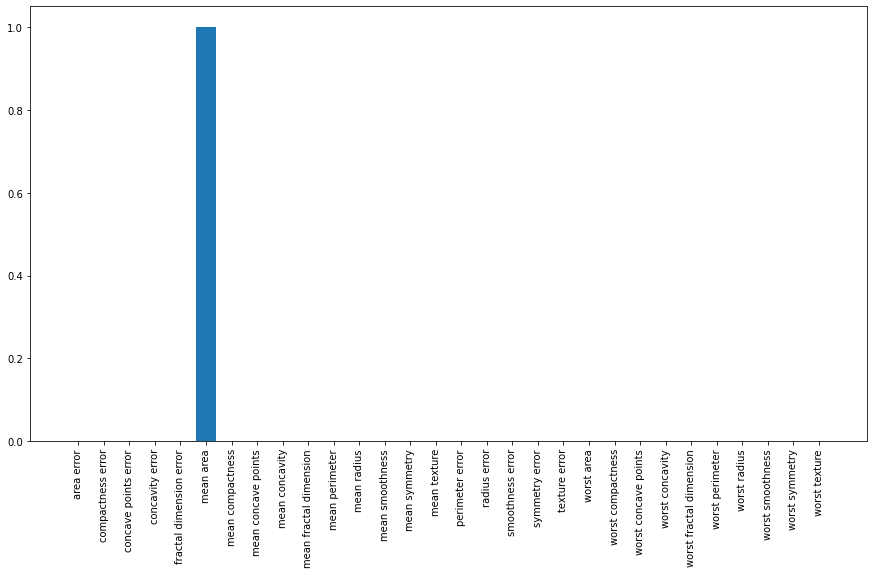

In [47]:
# 모델 학습 성능에 영향을 준 feature 확인하기 - 머신러닝 할 때마다 크게 기여한 frature 다르게 출력될 수 있음
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_dtc.feature_importances_)
plt.xticks(rotation=90)
plt.show()
# mean_area 즉, 종양 크기가 이 모델을 만드는 데 가장 큰 기여를 한 feature
# estimators의 공통적인 메서드와 함수도 있지만, feature_importances_ 가 없는 학습기도 있으니 tab키 눌러 사용할 수 있는 메서드 확인